In [1]:
import mne

raw = mne.io.read_raw_edf("dataset/chb01_03.edf")
raw.load_data()
raw.crop(2996, 3036) #seizure
# raw.crop(0, 30)

Extracting EDF parameters from c:\Users\angus\Documents\cs408-eeg-python\dataset\chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\angus\AppData\Local\Temp\ipykernel_7680\2789396482.py:3: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf("dataset/chb01_03.edf")


<RawEDF | chb01_03.edf, 23 x 10241 (40.0 s), ~1.8 MB, data loaded>

In [2]:
raw = raw.notch_filter(60, verbose=False)

iter_freqs = [("Delta", 0.5, 3), ("Theta", 4, 7), ("Alpha", 8, 12), ("Beta", 13, 25), ("Gamma", 30, 45)]
bands: dict[str, (mne.io.Raw, float, float)] = {}
for band, lo, hi in iter_freqs:
    print("filtering", band, "for lo, hi:", lo, hi)
    out = raw.copy()
    # bands[band] = out.filter(l_freq=lo, h_freq=None)
    bands[band] = (out.filter(l_freq=lo, h_freq=hi, method="fir", n_jobs=1, verbose=False), lo, hi)

filtering Delta for lo, hi: 0.5 3
filtering Theta for lo, hi: 4 7
filtering Alpha for lo, hi: 8 12
filtering Beta for lo, hi: 13 25
filtering Gamma for lo, hi: 30 45


Delta
Effective window size : 8.000 (s)
Theta
Effective window size : 8.000 (s)
Alpha
Effective window size : 8.000 (s)
Beta
Effective window size : 8.000 (s)
Gamma
Effective window size : 8.000 (s)


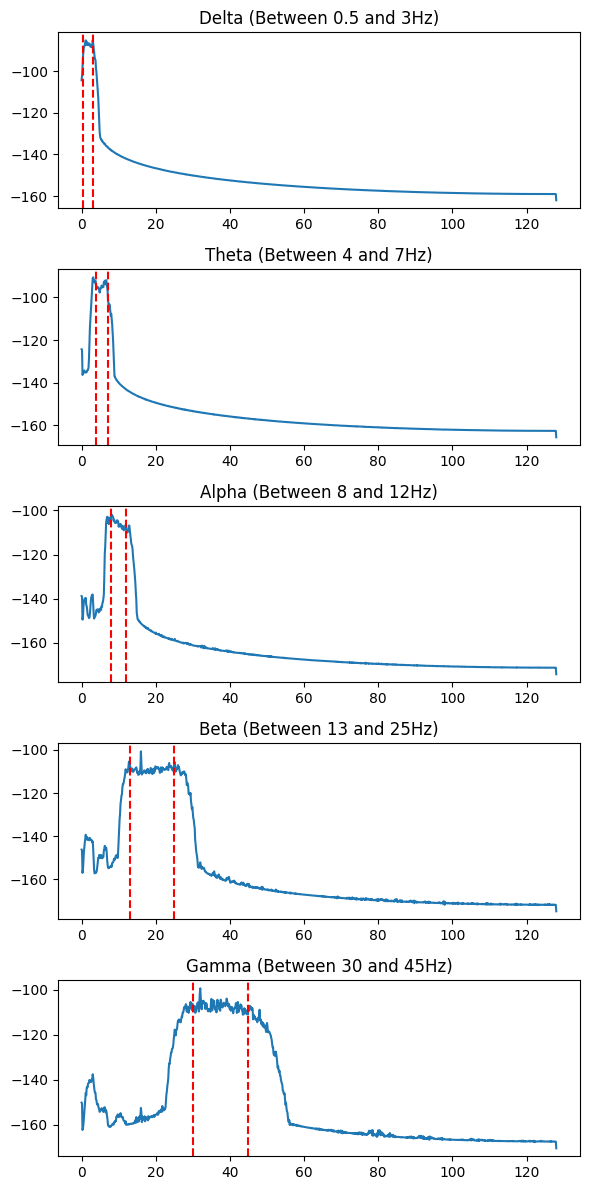

In [7]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(len(bands.keys()), figsize=(6,12))
for i, (band, (data, lo, hi)) in enumerate(bands.items()):
    # data.compute_psd().plot(axes=axs[i], show=False, db=True)
    # psd = data.compute_psd().plot(show=False, average=True)
    print(band)
    psd = data.compute_psd()
    psd_data = psd.get_data()
    freqs = psd.freqs
    axs[i].plot(freqs, 10 * np.log10(psd_data.mean(axis=0)))
    axs[i].axvline(x=lo, color="red", linestyle="--")
    axs[i].axvline(x=hi, color="red", linestyle="--")
    
    axs[i].set_title(f"{band} (Between {lo} and {hi}Hz)")
plt.tight_layout()
plt.show()

Delta
(23, 10241)
Theta
(23, 10241)
Alpha
(23, 10241)
Beta
(23, 10241)
Gamma
(23, 10241)


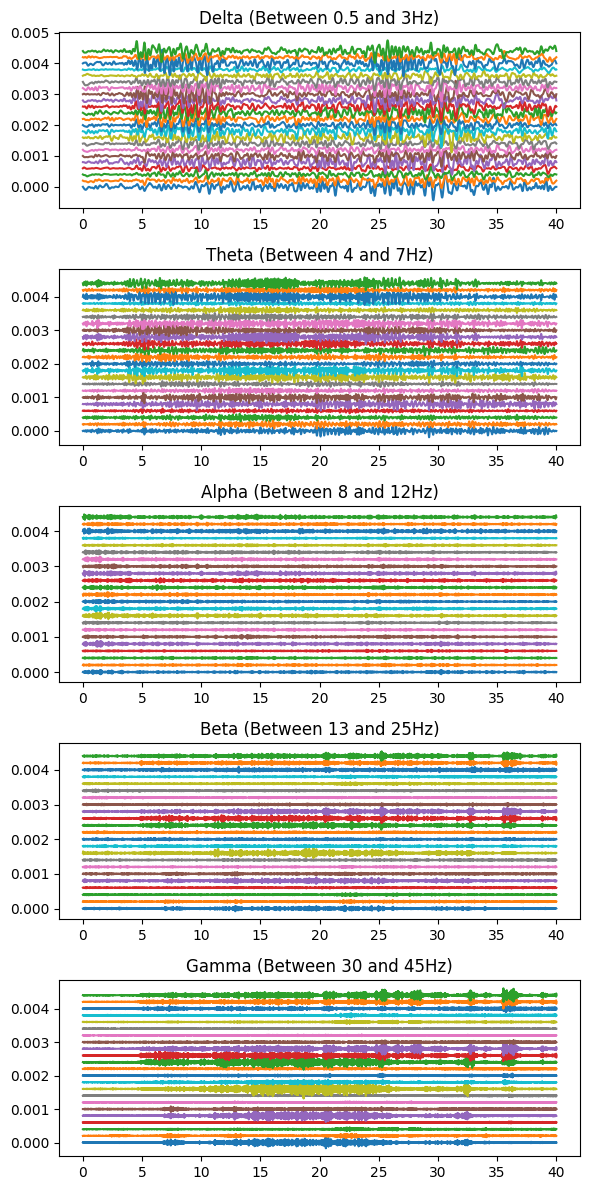

In [4]:
fig, axs = plt.subplots(len(bands.keys()), figsize=(6,12))
for i, (band, (data, lo, hi)) in enumerate(bands.items()):
    print(band)
    data: mne.io.Raw
    npdata, times = data.get_data(return_times=True)
    print(npdata.shape)
    for sensor_idx in range(npdata.shape[0]):

        axs[i].plot(times, npdata[sensor_idx] + 0.0002*sensor_idx)
    
    axs[i].set_title(f"{band} (Between {lo} and {hi}Hz)")
plt.tight_layout()
plt.show()
    

I think the best approach for the feature extraction now will be taking statistical measures of each band and passing that into a model, rather than raw EEG as there's too many data points to really be feasible. Another approach could be to downsample the data, but this will need further review.